In [14]:
from cec2017.functions import f4, f5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
def genetic(f, mu, sigma, k):
    max_iter = 10000
    tmax = int(max_iter/mu)
    UPPER_BOUND = 100
    DIMENSIONALITY = 10
    P = np.random.uniform(-UPPER_BOUND, UPPER_BOUND, size=(DIMENSIONALITY, mu))
    o_history = []

    o = evaluate(f, P)              # scoring
    x_hat, o_hat = find_best(o, P)

    for i in range(tmax):
        P = reproduce(P, sigma)
        P = tournament_selection(P, f, sigma)
        # M = genetic_operation()

        o = evaluate(f, P)
        x_curr, o_curr = find_best(o, P)
        o_history.append(o_hat)
        if (o_curr <= o_hat):
            o_hat = o_curr
            x_hat = x_curr
        P = succesion(P, k, sigma, mu)
    return x_hat, o_history


def find_best(o, P):
    best_index = o.index(min(o))    # find best
    x_hat = P[:,best_index]
    o_hat = o[best_index]
    return x_hat, o_hat



def evaluate(f, P):
    o = []
    for i in range(P.shape[1]):
        o.append(f(P[:,i]))
    return o

def tournament_selection(X, f, sigma):
    mu = 0
    X_out = X #allocation
    X1 = X + np.random.normal(mu, sigma, X.shape)
    o1 = evaluate(f, X1)
    X2 = X + np.random.normal(mu, sigma, X.shape)
    np.random.shuffle(X2)
    o2 = evaluate(f4, X2)
    for i in range(X.shape[1]):
        X_out[:,i] = X1[:,i] if o1[i] < o2[i] else X2[:,i]
    return X_out


    

def reproduce(X ,sigma):
    mu = 0
    X = X + np.random.normal(mu, sigma, X.shape)
    return X

def succesion(X, k, sigma, mu):
    UPPER_BOUND = 100
    DIMENSIONALITY = 10
    X = np.random.uniform(-UPPER_BOUND, UPPER_BOUND, size=(DIMENSIONALITY, mu))
    OUT = np.zeros(shape=X.shape)

    indexes = np.argsort(evaluate(f4, X))
    X = X[:,indexes]
    OUT[:,0:k] = X[:,0:k]
    M = reproduce(X, sigma)
    indexes = np.argsort(evaluate(f4, M))
    M = M[:,indexes]
    X[:,k:X.shape[1]] = M[:,0:X.shape[1]-k]
    return X


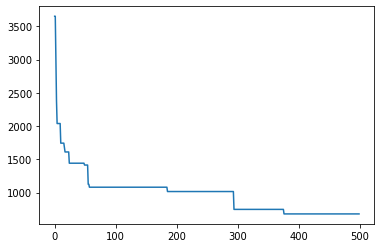

In [17]:
# hiperparametry
mu = 20         # size of population
sigma = 0.1     # for normal dist
k = 5           # size of the elit

x_hat, o_history = genetic(f4, mu, sigma, k)
plt.plot(o_history)

In [68]:
best_x = []
best_val = []

for i in range(50):
    mu = 10         # size of population
    sigma = 0.1     # for normal dist
    k = 5           # size of the elit

    x_hat, o_history = genetic(f4, mu, sigma, k)
    best_x.append(x_hat)
    best_val.append(o_history[-1])

min_val = min(best_val)
max_val = max(best_val)
std = np.std(best_val)
avg = np.mean(best_val)

print(f"min: {min_val} max: {max_val} std: {std} avg: {avg}")

min: 498.4936977475896 max: 885.8792802083542 std: 89.72736241532583 avg: 732.3037566476078


In [18]:
mu = [10,15,20,30]
sigma = [0.01, 0.05, 0.1, 0.2]
split = [5,7,9]

table_len = len(mu)*len(sigma)*len(split)
df = pd.DataFrame(columns=['mu', 'sigma','split','min_val','max_val','std','avg'], data = np.zeros(shape=(table_len,7), dtype=float))

index = 0
for j in range(len(mu)):
    for k in range(len(sigma)):
        for l in range(len(split)):
            df['mu'][index] = mu[j]
            df['sigma'][index] = sigma[k]
            df['split'][index] = split[l]

            best_x = []
            best_val = []

            for i in range(50):
                mu_in = mu[j]
                sigma_in = sigma[k]
                split_in = split[l]

                x_hat, o_history = genetic(f4, mu_in, sigma_in, split_in)
                best_x.append(x_hat)
                best_val.append(o_history[-1])

            min_val = min(best_val)
            max_val = max(best_val)
            std = np.std(best_val)
            avg = np.mean(best_val)

            df['min_val'][index] = min(best_val)
            df['max_val'][index] = max(best_val)
            df['std'][index] = np.std(best_val)
            df['avg'][index] = np.mean(best_val)
            index += 1


In [19]:
df.to_csv('metrics2.csv')

In [20]:
df

,mu,sigma,split,min_val,max_val,std,avg
0,10.0,0.01,5.0,496.420152,986.051481,98.886368,694.922561
1,10.0,0.01,7.0,531.832406,938.657990,94.048284,716.360629
2,10.0,0.01,9.0,529.679138,851.886936,76.435165,699.329206
3,10.0,0.05,5.0,523.839200,842.058550,75.770545,692.462993
4,10.0,0.05,7.0,514.690058,853.611033,80.640938,693.926703
5,10.0,0.05,9.0,451.071587,962.552097,94.299239,662.899981
6,10.0,0.10,5.0,542.904753,931.041577,85.708835,731.425492
7,10.0,0.10,7.0,474.935840,953.549408,97.528073,691.373297
8,10.0,0.10,9.0,551.866990,857.126995,68.647494,696.384787
9,10.0,0.20,5.0,500.838663,997.741078,103.767953,717.884700


In [3]:
df = pd.read_csv("metrics.csv")

In [10]:
df[:][df['min_val']==min(df['min_val'])]

,Unnamed: 0,mu,sigma,split,min_val,max_val,std,avg
30,30,30.0,0.1,5.0,444.383943,838.01101,83.760744,671.21731


In [11]:
df[:][df['max_val']==min(df['max_val'])]

,Unnamed: 0,mu,sigma,split,min_val,max_val,std,avg
19,19,20.0,0.05,7.0,570.460956,767.53207,50.710392,661.939282


In [12]:
df[:][df['std']==min(df['std'])]

,Unnamed: 0,mu,sigma,split,min_val,max_val,std,avg
19,19,20.0,0.05,7.0,570.460956,767.53207,50.710392,661.939282


In [13]:
df[:][df['avg']==min(df['avg'])]

,Unnamed: 0,mu,sigma,split,min_val,max_val,std,avg
29,29,30.0,0.05,9.0,479.727347,896.771146,101.721939,658.440412


In [ ]:
df = pd.read_csv("metrics2.csv")

In [25]:
df

,mu,sigma,split,min_val,max_val,std,avg
0,10.0,0.01,5.0,496.420152,986.051481,98.886368,694.922561
1,10.0,0.01,7.0,531.832406,938.657990,94.048284,716.360629
2,10.0,0.01,9.0,529.679138,851.886936,76.435165,699.329206
3,10.0,0.05,5.0,523.839200,842.058550,75.770545,692.462993
4,10.0,0.05,7.0,514.690058,853.611033,80.640938,693.926703
5,10.0,0.05,9.0,451.071587,962.552097,94.299239,662.899981
6,10.0,0.10,5.0,542.904753,931.041577,85.708835,731.425492
7,10.0,0.10,7.0,474.935840,953.549408,97.528073,691.373297
8,10.0,0.10,9.0,551.866990,857.126995,68.647494,696.384787
9,10.0,0.20,5.0,500.838663,997.741078,103.767953,717.884700


In [21]:
df[:][df['min_val']==min(df['min_val'])]

,mu,sigma,split,min_val,max_val,std,avg
5,10.0,0.05,9.0,451.071587,962.552097,94.299239,662.899981


In [22]:
df[:][df['max_val']==min(df['max_val'])]

,mu,sigma,split,min_val,max_val,std,avg
12,15.0,0.01,5.0,514.177562,821.334758,80.548774,682.584419


In [23]:
df[:][df['std']==min(df['std'])]

,mu,sigma,split,min_val,max_val,std,avg
8,10.0,0.1,9.0,551.86699,857.126995,68.647494,696.384787


In [24]:
df[:][df['avg']==min(df['avg'])]

,mu,sigma,split,min_val,max_val,std,avg
5,10.0,0.05,9.0,451.071587,962.552097,94.299239,662.899981


dla różnych parametrów różne metryki najlepsze

wpływ rozmiaru elit

In [131]:
no_plots = int(df.shape[0]/3)

split_axis = df['split'][0:3].values
mu_axis = [10, 15, 20, 30]
sigma_axis = df['sigma'].unique()

In [76]:
df['split'][0:3].values

array([5., 7., 9.])

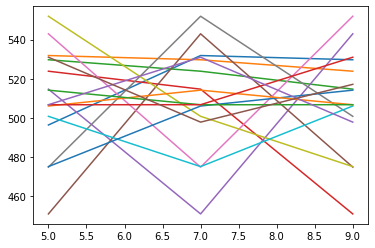

In [79]:
for i in range(no_plots):
    plt.plot(split_axis, df['min_val'][0+i:3+i].values)

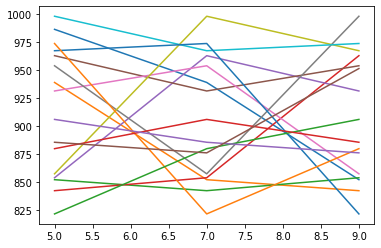

In [80]:
for i in range(no_plots):
    plt.plot(split_axis, df['max_val'][0+i:3+i].values)
plt.show()

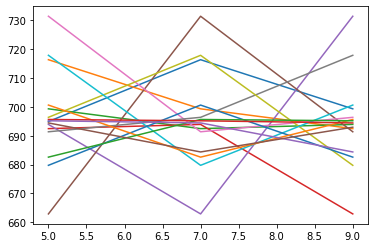

In [81]:
for i in range(no_plots):
    plt.plot(split_axis, df['avg'][0+i:3+i].values)
plt.show()

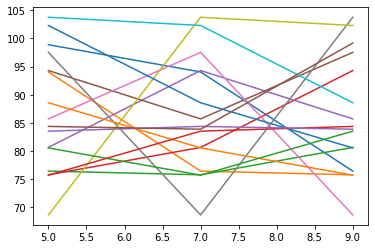

In [82]:
for i in range(no_plots):
    plt.plot(split_axis, df['std'][0+i:3+i].values)
plt.show()

k

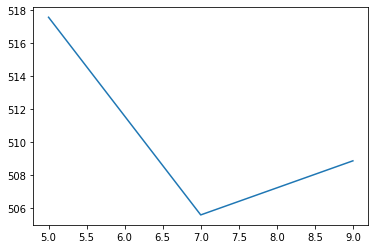

In [98]:
plt.plot(split_axis, np.mean(np.reshape(df['min_val'].values, (16,3)), axis=0))

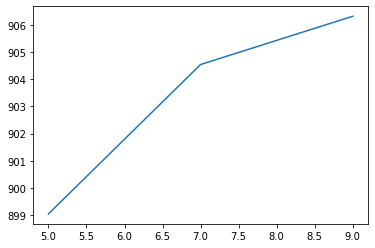

In [102]:
plt.plot(split_axis, np.mean(np.reshape(df['max_val'].values, (16,3)), axis=0))

w sumie nie wiem czemu rośnie, może dlatego, że większe elity powodują mniej losowe choodzenie i nie znajdowanie optimu, albo, któreś połączenie parametrów powoduje mocne odchylenie i zmienia statystyke

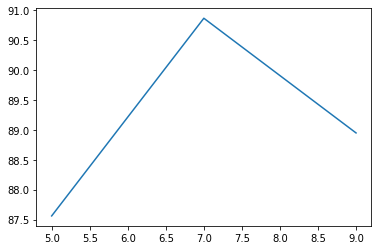

In [103]:
plt.plot(split_axis, np.mean(np.reshape(df['std'].values, (16,3)), axis=0))

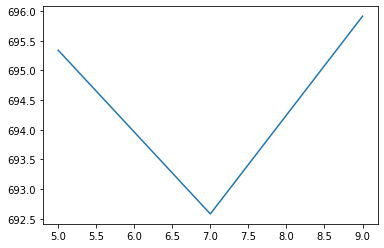

In [104]:
plt.plot(split_axis, np.mean(np.reshape(df['avg'].values, (16,3)), axis=0))

ciężko powiedzieć jednoznacznie, da się zauważyć trend, tego też można było sie spodziewać, mu powinno być powiązane z k

mu

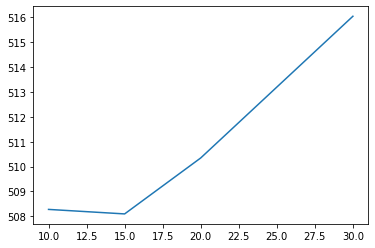

In [112]:
plt.plot(mu_axis, np.mean(np.reshape(df['min_val'].values, (4,12)), axis=1))

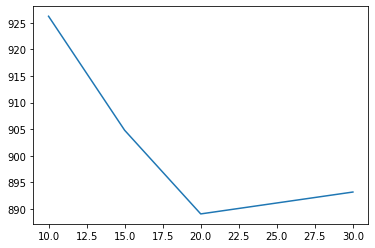

In [114]:
plt.plot(mu_axis, np.mean(np.reshape(df['max_val'].values, (4,12)), axis=1))

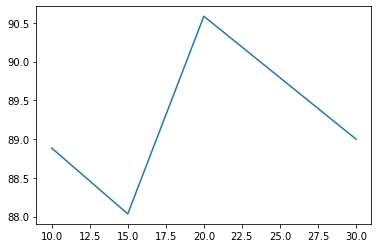

In [115]:
plt.plot(mu_axis, np.mean(np.reshape(df['std'].values, (4,12)), axis=1))

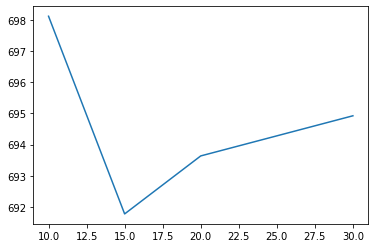

In [116]:
plt.plot(mu_axis, np.mean(np.reshape(df['avg'].values, (4,12)), axis=1))

raczej dla mu = 15 najlepiej

sigma

In [124]:
df_for_sigma = df.sort_values(by=['sigma'])


In [126]:
df_for_sigma

,mu,sigma,split,min_val,max_val,std,avg
0,10.0,0.01,5.0,496.420152,986.051481,98.886368,694.922561
38,30.0,0.01,9.0,552.520742,869.943391,84.886862,699.088928
26,20.0,0.01,9.0,487.532465,909.240953,94.246769,699.785330
25,20.0,0.01,7.0,520.555536,847.326282,81.099922,683.567018
24,20.0,0.01,5.0,470.715937,860.834238,94.952870,701.566718
37,30.0,0.01,7.0,483.134652,978.019900,123.427293,707.234773
14,15.0,0.01,9.0,506.760294,905.674423,83.527279,695.186175
13,15.0,0.01,7.0,506.734424,879.557337,75.714923,695.639713
12,15.0,0.01,5.0,514.177562,821.334758,80.548774,682.584419
36,30.0,0.01,5.0,551.800192,878.282740,85.754983,692.507670


In [125]:
np.reshape(df_for_sigma['min_val'].values, (4,12))

array([[496.42015216, 552.520742  , 487.53246531, 520.55553601,
        470.7159366 , 483.13465176, 506.76029443, 506.73442388,
        514.17756178, 551.8001919 , 529.67913802, 531.83240646],
       [514.69005797, 532.81178473, 490.38520154, 512.09872414,
        488.6422495 , 523.8392002 , 470.03377178, 497.87377211,
        530.97088121, 513.92592789, 517.1512498 , 451.07158669],
       [504.13402095, 542.24632234, 546.94896778, 517.5740204 ,
        572.3644662 , 512.53946867, 485.65791074, 542.90475253,
        474.93584043, 551.86699038, 552.98026932, 509.05069734],
       [534.90291066, 514.01878117, 490.36660497, 512.97892046,
        498.54067486, 532.89489788, 469.36510157, 506.09029052,
        475.19918561, 500.83866343, 515.12385557, 454.25598144]])

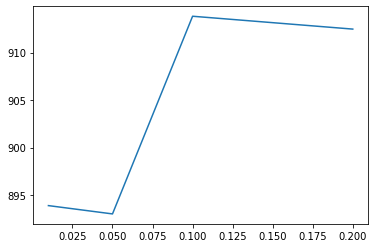

In [133]:
plt.plot(sigma_axis, np.mean(np.reshape(df_for_sigma['max_val'].values, (4,12)), axis=1))

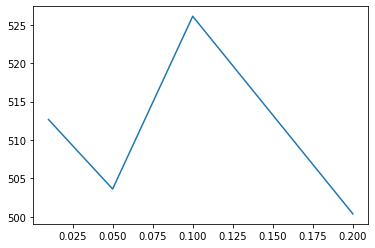

In [134]:
plt.plot(sigma_axis, np.mean(np.reshape(df_for_sigma['min_val'].values, (4,12)), axis=1))

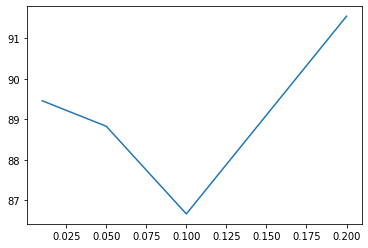

In [135]:
plt.plot(sigma_axis, np.mean(np.reshape(df_for_sigma['std'].values, (4,12)), axis=1))

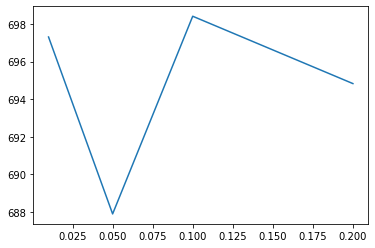

In [132]:
plt.plot(sigma_axis, np.mean(np.reshape(df_for_sigma['avg'].values, (4,12)), axis=1))

sigma też się wydaje być mocno zależna od innych parametrów, ciężko wyznaczyć jakąś globalną "mądrość"

Podsumowując:
mu zdaje się mieć największy wpływ, sigma powinna być odpowiednio dobrana w zależności od innych parametrów, a parametr k powinien być odpowiednio dobrany na podsatwie mu, myślę, że k równe około mu/2 to dobry start

odwrotnie proporcjonalne średnia i std?